In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import matplotlib.pyplot as plt
import graphviz

In [24]:
df=pd.read_csv('heart.csv')
df = df.dropna()
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [25]:
from sklearn.preprocessing import MinMaxScaler
Xn = df.drop("sex", axis = 1).drop("cp", axis = 1).drop("fbs", axis = 1).drop("restecg", axis = 1).drop("exang", axis = 1).drop("target", axis = 1).drop("slope", axis = 1).drop("ca", axis = 1).drop("thal", axis = 1)
df = df.drop("age", axis = 1).drop("trestbps", axis = 1).drop("chol", axis = 1).drop("thalach", axis = 1).drop("oldpeak", axis = 1)

print(Xn.head(5), "\n")
print(df.head(5), "\n")

min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(Xn)

# Нормализация

from sklearn import preprocessing

X_normalized = preprocessing.normalize(X_train_minmax, norm='l2')
#frame = pd.DataFrame(X_normalized)
frame = pd.DataFrame(X_normalized, columns = ['age','trestbps','chol','thalach','oldpeak'])
print(frame.head(5), "\n")

df = pd.concat([df,frame], axis=1)

print(df.head(5), "\n")

   age  trestbps  chol  thalach  oldpeak
0   52       125   212      168      1.0
1   53       140   203      155      3.1
2   70       145   174      125      2.6
3   61       148   203      161      0.0
4   62       138   294      106      1.9 

   sex  cp  fbs  restecg  exang  slope  ca  thal  target
0    1   0    0        1      0      2   2     3       0
1    1   0    1        0      1      0   0     3       0
2    1   0    0        1      1      0   0     3       0
3    1   0    0        1      0      2   1     3       0
4    0   0    1        1      0      1   3     2       0 

        age  trestbps      chol   thalach   oldpeak
0  0.497415  0.303590  0.203825  0.768657  0.167433
1  0.470279  0.408166  0.165349  0.603105  0.470279
2  0.743773  0.418950  0.095426  0.358939  0.365157
3  0.606845  0.463721  0.160024  0.625375  0.000000
4  0.702638  0.424234  0.392007  0.273059  0.313199 

   sex  cp  fbs  restecg  exang  slope  ca  thal  target       age  trestbps  \
0    1   0    

In [26]:
X=df.iloc[:, [0, 9]]
y=df.iloc[:,8]
X

,sex,age
0,1,0.497415
1,1,0.470279
2,1,0.743773
3,1,0.606845
4,0,0.702638
...,...,...
1020,1,0.587955
1021,1,0.620610
1022,1,0.569314
1023,0,0.504896


In [27]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0) #разбиваем выборку на обучающую и тестовую

In [29]:
X

,sex,age
0,1,0.497415
1,1,0.470279
2,1,0.743773
3,1,0.606845
4,0,0.702638
...,...,...
1020,1,0.587955
1021,1,0.620610
1022,1,0.569314
1023,0,0.504896


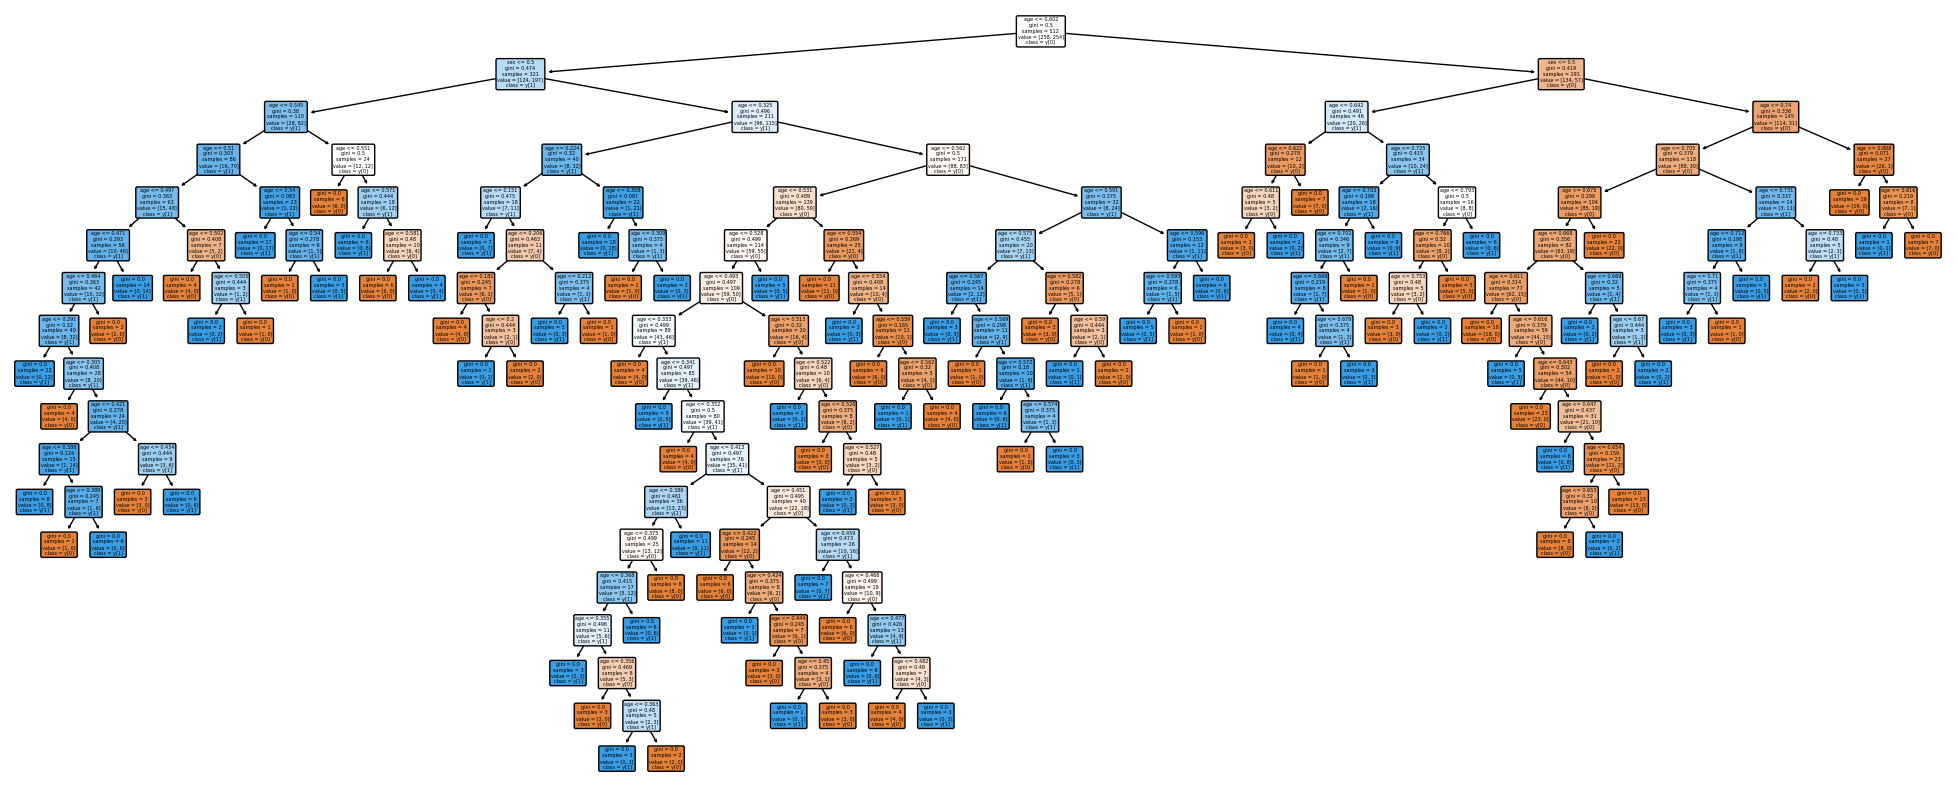

Проверка на новом образце [0]


/home/ilia/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [30]:
clf = DecisionTreeClassifier() # создаем классификатор на основе дерева
clf = clf.fit(X_train, y_train) # обучаем его, т.е. создаем само дерево
y_score=clf.predict(X_test)
plt.figure(figsize=((25,10)))
plot_tree(clf,filled=True, feature_names = X.columns.to_list(), class_names = True,rounded=True)
plt.show()
# проверка на новых образцах
sample_1=clf.predict([[3,4]])
print(f"Проверка на новом образце {sample_1}")

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       241
           1       0.93      0.93      0.93       272

    accuracy                           0.93       513
   macro avg       0.93      0.93      0.93       513
weighted avg       0.93      0.93      0.93       513

[[222  19]
 [ 18 254]]


Text(0.5, 1.1, 'Матрица неточности \n')

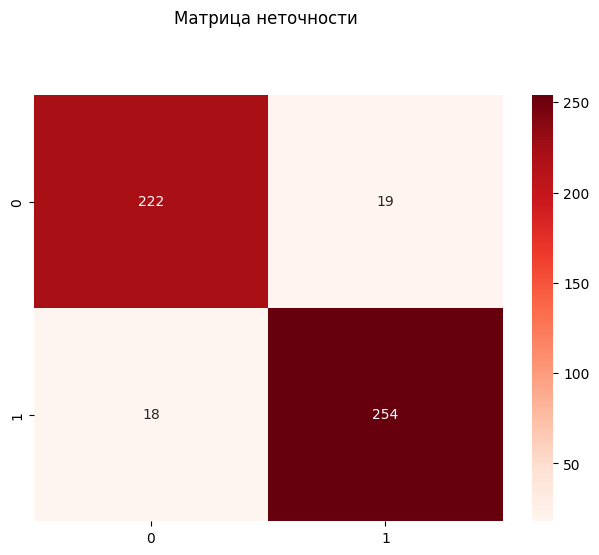

In [31]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# оценка точности модели
print(metrics.classification_report(y_test, y_score))
# матрица неточности
confusion_matrix = confusion_matrix(y_test, y_score)
print(confusion_matrix)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности \n', y=1.1)

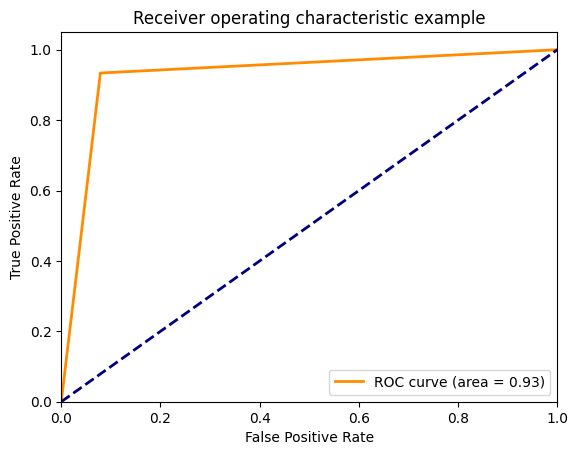

In [32]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test > 0, y_score  > 0)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [34]:
dot_data = export_graphviz(clf, out_file=None) # конвертируем в DOT (в переменную или в файл)

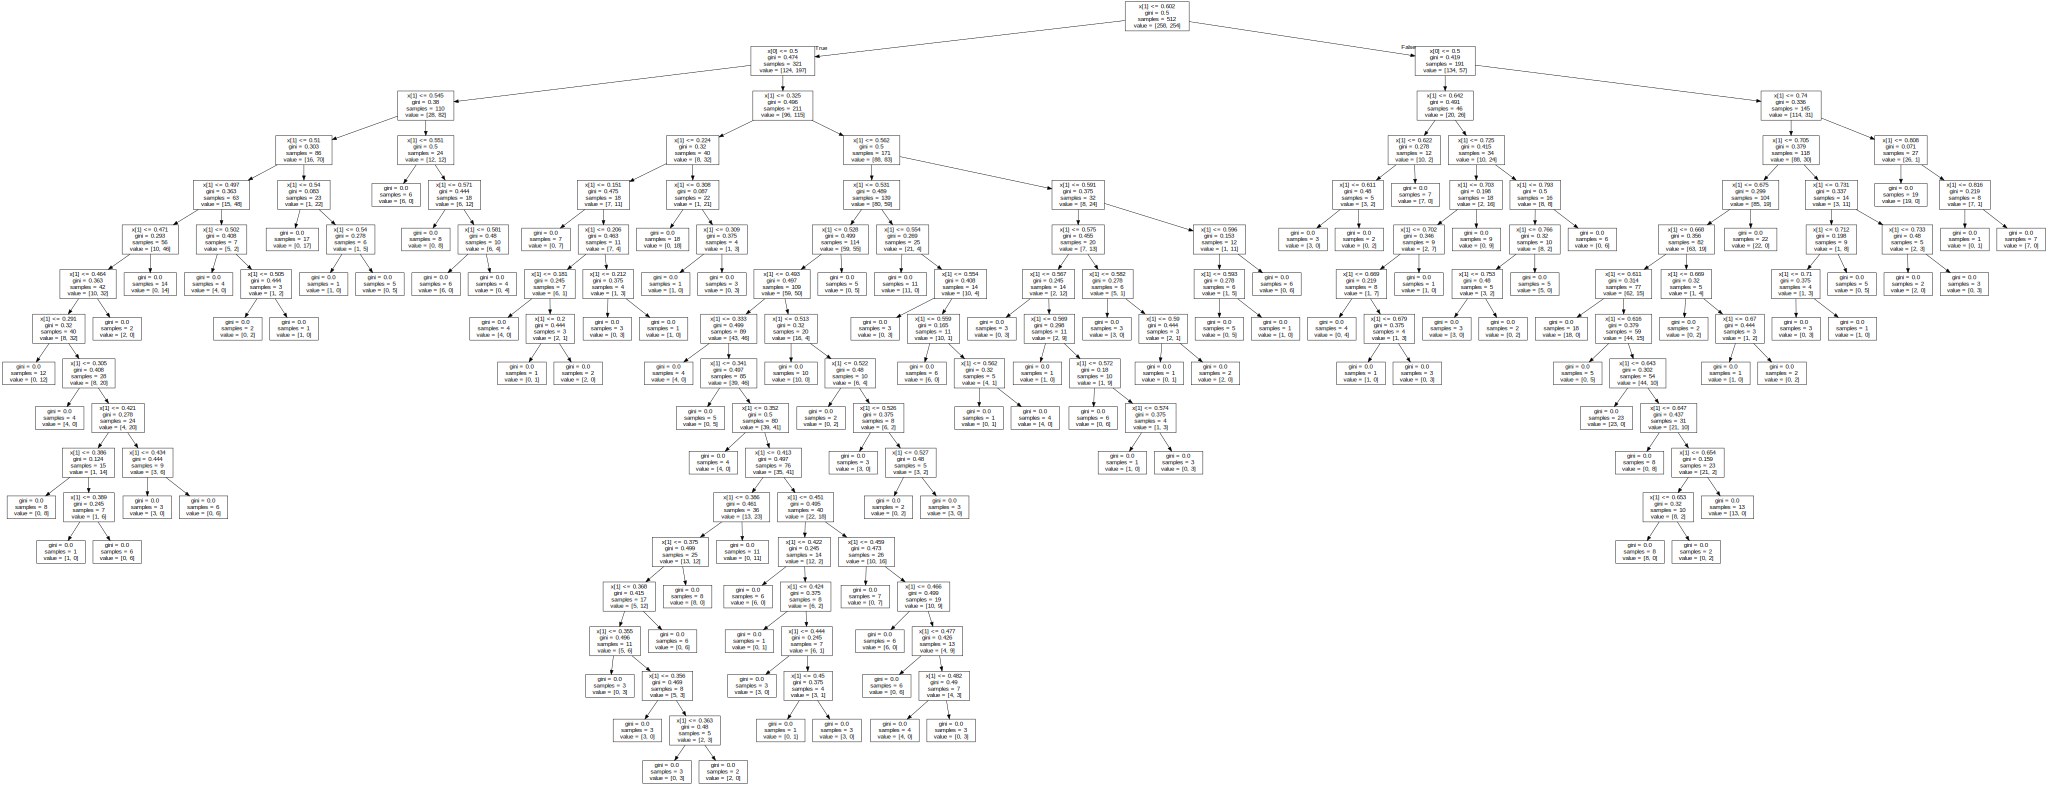

In [35]:
graphviz.Source(dot_data)

In [ ]:
from sklearn.tree import export_text # подключаем функцию
r = export_text(clf, feature_names=X.columns.tolist()) # переводим дерево в текстовую строку
print(r) # печатаем

|--- age <= 0.60
|   |--- sex <= 0.50
|   |   |--- age <= 0.55
|   |   |   |--- age <= 0.51
|   |   |   |   |--- age <= 0.50
|   |   |   |   |   |--- age <= 0.47
|   |   |   |   |   |   |--- age <= 0.46
|   |   |   |   |   |   |   |--- age <= 0.29
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- age >  0.29
|   |   |   |   |   |   |   |   |--- age <= 0.30
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- age >  0.30
|   |   |   |   |   |   |   |   |   |--- age <= 0.42
|   |   |   |   |   |   |   |   |   |   |--- age <= 0.39
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- age >  0.39
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- age >  0.42
|   |   |   |   |   |   |   |   |   |   |--- age <= 0.43
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--

0.7777777777777778
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       241
           1       0.81      0.76      0.78       272

    accuracy                           0.78       513
   macro avg       0.78      0.78      0.78       513
weighted avg       0.78      0.78      0.78       513

[[191  50]
 [ 64 208]]


Text(0.5, 1.1, 'Матрица неточности \n')

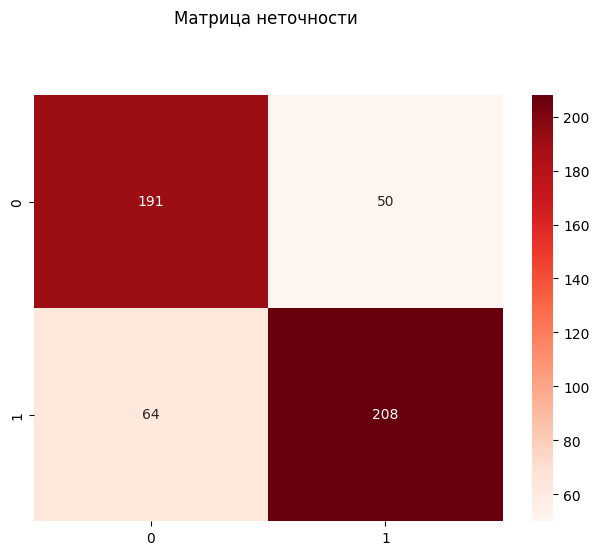

In [ ]:
from sklearn.datasets import make_classification # для генерации данных
from sklearn.model_selection import train_test_split # для разделения на обучение и тест
from sklearn.ensemble import RandomForestClassifier # случайный лес
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import numpy as np
import seaborn as sns # для простого отображения
import matplotlib.pyplot as plt #

# Создаем классификатор на основе случайного леса. Изменяйте параметры и смотрите как это влияет на обучение
clf = RandomForestClassifier(max_depth=5,# максимальная глубина дерева
                             n_estimators=10,# число деревьев в лесу
                             max_features=1)# максимальное число признаков для каждого дерева

clf.fit(X_train, y_train) # обучаем

y_pred = clf.predict(X_test) # проверяем на тестовых данных

score=clf.score(X_test, y_test) # считаем среднюю точность
print(score)

# оценка точности модели
print(metrics.classification_report(y_test, y_pred))
# матрица неточности
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности \n', y=1.1)

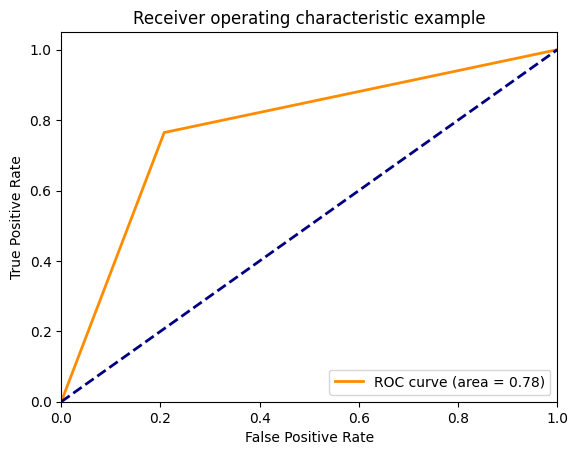

In [ ]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test > 0, y_pred  > 0)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Визуализация леса

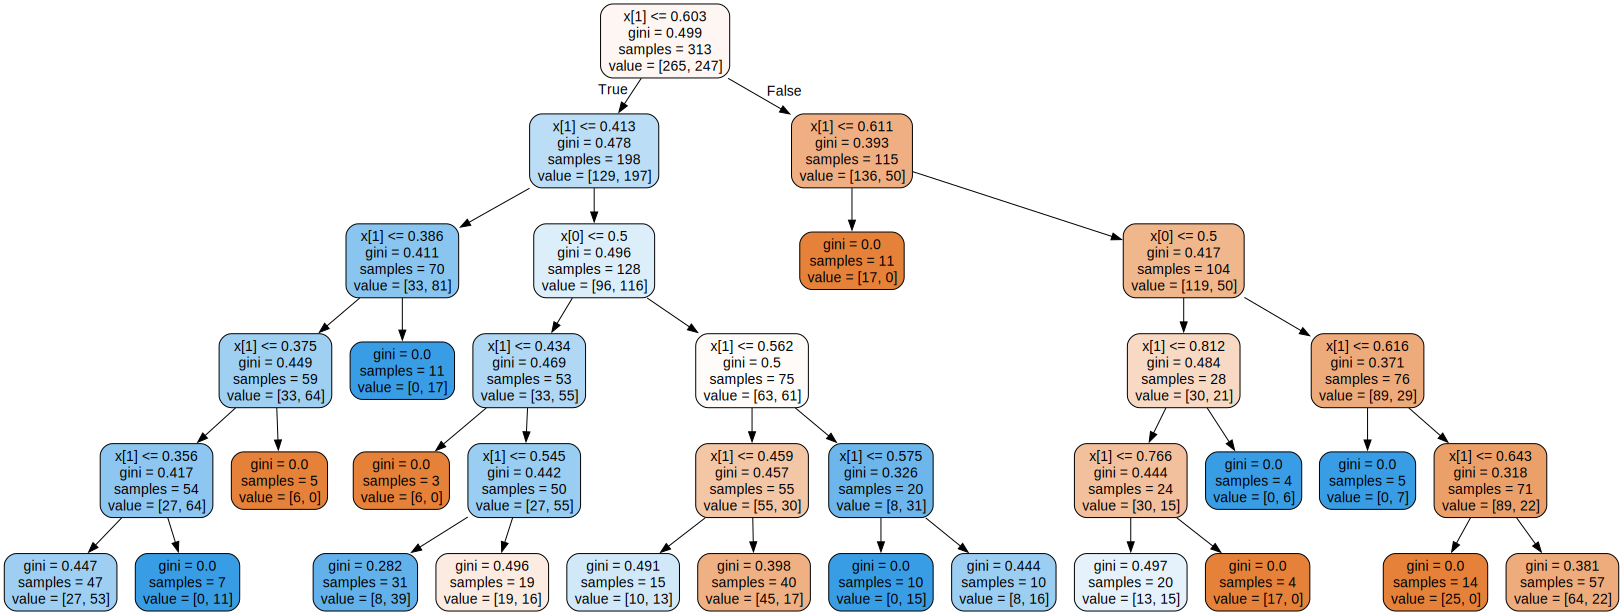

In [ ]:
tree_data=clf.estimators_[2] # третье дерево

# рисуем его
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(tree_data, out_file=None,  # можем указать дополнительные опции конвертации
                     filled=True, rounded=True)  # прочие детали отображения
graph = graphviz.Source(dot_data)  # # загружаем дерево из переменной или файла в представление graphviz
graph  # отображаем на экране

In [ ]:
# import graphviz # подключаем библиотеку для отображения деревьев
# dot_data = export_graphviz(clf, out_file=None) # конвертируем в DOT (в переменную или в файл)
# graph = graphviz.Source(dot_data)  # загружаем дерево из переменной или файла в представление graphviz
# graph.render("Сейв") # отображаем в файл (по умолчанию pdf)